In [1]:
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings


Отключаем предупреждения

In [2]:
warnings.filterwarnings("ignore")

Открываем датасет. Заметим, что в сsv файле при открытии будет получаться пустая колонка

In [3]:
df_train = pd.read_csv("C://Users//yegor//Desktop//datatech_internship//model//X_data.csv",sep = ";").rename(columns = {"Unnamed: 0":"Date"})

Смотрим на первые 10 строк датасета

In [4]:
df_train.head(10)

,Date,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,01.01.2015 0:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,01.01.2015 0:01,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,01.01.2015 0:02,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,01.01.2015 0:03,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,01.01.2015 0:04,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
5,01.01.2015 0:05,213,211,211,342,350,346,479,473,482,360,349,354,243,241,242,163.81,9.22
6,01.01.2015 0:06,213,212,211,341,349,346,480,473,482,363,350,354,244,241,242,166.14,9.22
7,01.01.2015 0:07,213,212,211,340,348,345,482,473,482,365,350,354,244,241,242,164.38,9.22
8,01.01.2015 0:08,213,212,211,339,347,345,483,473,482,367,350,354,244,241,242,163.89,9.22
9,01.01.2015 0:09,213,212,211,338,347,345,484,473,483,369,350,354,245,241,242,162.82,9.22


Cмотрим общую информацию по датасету

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Date        1048575 non-null  object 
 1   T_data_1_1  1048575 non-null  int64  
 2   T_data_1_2  1048575 non-null  int64  
 3   T_data_1_3  1048575 non-null  int64  
 4   T_data_2_1  1048575 non-null  int64  
 5   T_data_2_2  1048575 non-null  int64  
 6   T_data_2_3  1048575 non-null  int64  
 7   T_data_3_1  1048575 non-null  int64  
 8   T_data_3_2  1048575 non-null  int64  
 9   T_data_3_3  1048575 non-null  int64  
 10  T_data_4_1  1048575 non-null  int64  
 11  T_data_4_2  1048575 non-null  int64  
 12  T_data_4_3  1048575 non-null  int64  
 13  T_data_5_1  1048575 non-null  int64  
 14  T_data_5_2  1048575 non-null  int64  
 15  T_data_5_3  1048575 non-null  int64  
 16  H_data      1048575 non-null  float64
 17  AH_data     1048575 non-null  float64
dtypes: float64(2), int64(1

### Анализ данных по температуре и влажности в различных камерах:

#### Температурные данные:

**Камера 1:**
- Средняя температура: около 250 градусов
- Мин/Макс значения: -159 градусов / 673 градуса
- Стандартное отклонение: 31.26

**Камера 2:**
- Средняя температура: около 350 градусов
- Мин/Макс значения: -122 градуса / 552 градуса
- Стандартное отклонение: 30.17

**Камера 3:**
- Средняя температура: около 500 градусов
- Мин/Макс значения: -107 градусов / 551 градус
- Стандартное отклонение: 30.75

#### Влажность:

**H_data (Влажность):**
- Среднее значение: около 174
- Мин/Макс значения: 20 / 300
- Стандартное отклонение: 45.67

#### Абсолютная влажность:

**AH_data (Абсолютная влажность):**
- Среднее значение: около 7.2
- Мин/Макс значения: 2.1 / 15.8
- Стандартное отклонение: 2.89

### Анализ данных по температуре и влажности в различных камерах:

**T_data_1_1, T_data_1_2, T_data_1_3 (Температурные данные в камере 1):**
- Средние значения температуры в камере 1 примерно равны и составляют около 250 градусов.
- Минимальные и максимальные значения температуры в камере 1 указывают на наличие выбросов.
- Стандартное отклонение для каждой колонки температуры в камере 1 относительно невысокое, что может указывать на стабильность данных.

**T_data_2_1, T_data_2_2, T_data_2_3 (Температурные данные в камере 2):**
- Средние значения температуры в камере 2 также примерно равны и составляют около 350 градусов.
- Минимальные и максимальные значения температуры в камере 2 также указывают на наличие выбросов.
- Стандартное отклонение для каждой колонки температуры в камере 2 относительно невысокое, что может указывать на стабильность данных.

**T_data_3_1, T_data_3_2, T_data_3_3 (Температурные данные в камере 3):**
- Средние значения температуры в камере 3 примерно равны и составляют около 500 градусов.
- Минимальные и максимальные значения температуры в камере 3 также указывают на наличие выбросов.
- Стандартное отклонение для каждой колонки температуры в камере 3 относительно невысокое, что может указывать на стабильность данных.

**H_data (Влажность):**
- Среднее значение влажности составляет около 174, что может быть в пределах нормы.
- Минимальное и максимальное значения влажности могут указывать на наличие выбросов.
- Стандартное отклонение для влажности относительно невысокое, что может указывать на стабильность данных.

**AH_data (Абсолютная влажность):**
- Среднее значение абсолютной влажности составляет около 7.2, что может быть в пределах нормы.
- Минимальное и максимальное значения абсолютной влажности также указывают на наличие выбросов.
- Стандартное отклонение для абсолютной влажности относительно невысокое, что может указывать на стабильность данных.


In [6]:
df_train.describe()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.508437e+02,2.503631e+02,2.508100e+02,3.498868e+02,3.499247e+02,3.496940e+02,5.015208e+02,5.015090e+02,5.018405e+02,3.494235e+02,3.494177e+02,3.502423e+02,2.495650e+02,2.497429e+02,2.496968e+02,1.745375e+02,7.186500e+00
std,3.126397e+01,3.017005e+01,3.075496e+01,4.427605e+01,4.083232e+01,3.722383e+01,6.010947e+01,6.703041e+01,6.207575e+01,3.883590e+01,3.877814e+01,4.085349e+01,3.080617e+01,3.033629e+01,2.971770e+01,1.441615e+01,1.825936e+00
min,-1.590000e+02,-1.220000e+02,-1.070000e+02,-7.030000e+02,-7.660000e+02,-1.910000e+02,-3.170000e+02,-7.590000e+02,-4.490000e+02,-1.520000e+02,-4.710000e+02,-6.090000e+02,-8.900000e+01,-1.250000e+02,-1.300000e+02,1.414900e+02,1.240000e+00
25%,2.290000e+02,2.290000e+02,2.300000e+02,3.280000e+02,3.280000e+02,3.280000e+02,4.650000e+02,4.650000e+02,4.650000e+02,3.270000e+02,3.280000e+02,3.280000e+02,2.290000e+02,2.290000e+02,2.290000e+02,1.623100e+02,6.420000e+00
50%,2.510000e+02,2.510000e+02,2.510000e+02,3.500000e+02,3.500000e+02,3.500000e+02,5.020000e+02,5.020000e+02,5.020000e+02,3.500000e+02,3.500000e+02,3.500000e+02,2.490000e+02,2.500000e+02,2.500000e+02,1.743100e+02,7.410000e+00
75%,2.720000e+02,2.720000e+02,2.720000e+02,3.720000e+02,3.730000e+02,3.720000e+02,5.380000e+02,5.380000e+02,5.390000e+02,3.720000e+02,3.710000e+02,3.720000e+02,2.700000e+02,2.700000e+02,2.700000e+02,1.866600e+02,8.250000e+00
max,6.730000e+02,5.520000e+02,5.510000e+02,1.009000e+03,1.179000e+03,8.760000e+02,1.434000e+03,2.505000e+03,1.319000e+03,9.120000e+02,7.410000e+02,7.980000e+02,9.050000e+02,7.380000e+02,5.380000e+02,2.077400e+02,1.224000e+01


Функция `check_outlier` для проверки выбросов в данных

In [7]:
def check_outlier(df):
    for feature in df.columns:
        if feature == 'Date':
            continue
        
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        LQR = Q3 - Q1
        lower = Q1 - 1.5*LQR 
        upper = Q3 + 1.5*LQR
        
        if df[(df[feature] > upper)].any(axis = None):
            print(feature, "yes")
        else:
            print(feature, "no")

check_outlier(df_train)



T_data_1_1 yes
T_data_1_2 yes
T_data_1_3 yes
T_data_2_1 yes
T_data_2_2 yes
T_data_2_3 yes
T_data_3_1 yes
T_data_3_2 yes
T_data_3_3 yes
T_data_4_1 yes
T_data_4_2 yes
T_data_4_3 yes
T_data_5_1 yes
T_data_5_2 yes
T_data_5_3 yes
H_data no
AH_data yes


Проанализируем подробно каждую колонку с выбросом. Начнём с AH_data

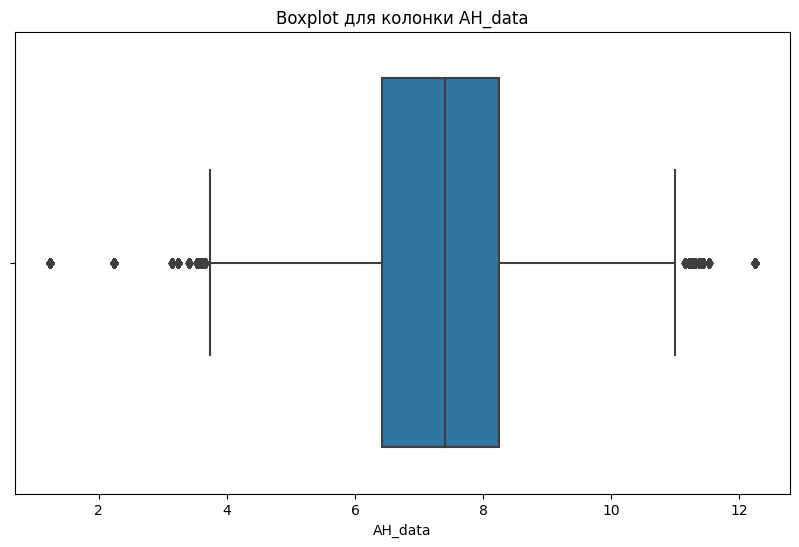

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['AH_data'])
plt.title('Boxplot для колонки AH_data')
plt.show()

In [9]:
'''Q1 = df_train['AH_data'].quantile(0.25)
Q3 = df_train['AH_data'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_train[(df_train['AH_data'] < Q1 - 1.5*IQR) | (df_train['AH_data'] > Q3 + 1.5*IQR)]

outlier_list = outliers['AH_data'].to_list()

# Формирование словаря с количеством повторений выбросов
outlier_dict = {}
for outlier in outlier_list:
    if outlier in outlier_dict:
        outlier_dict[outlier] += 1
    else:
        outlier_dict[outlier] = 1

print('Словарь выбросов и их количество:')
print(outlier_dict)

# Расчет процентного отношения выбросов к общему количеству данных
total_data_count = len(df_train['AH_data'])
outliers_count = len(outlier_list)
outliers_percentage = (outliers_count / total_data_count) * 100

print('Процентное отношение выбросов к общему количеству данных в колонке AH_data:', round(outliers_percentage,2))

min_humidity = df_train['AH_data'].min()
max_humidity = df_train['AH_data'].max()

print(f"Минимальная влажность сырья: {min_humidity}")
print(f"Максимальная влажность сырья: {max_humidity}")'''

'Q1 = df_train[\'AH_data\'].quantile(0.25)\nQ3 = df_train[\'AH_data\'].quantile(0.75)\nIQR = Q3 - Q1\noutliers = df_train[(df_train[\'AH_data\'] < Q1 - 1.5*IQR) | (df_train[\'AH_data\'] > Q3 + 1.5*IQR)]\n\noutlier_list = outliers[\'AH_data\'].to_list()\n\n# Формирование словаря с количеством повторений выбросов\noutlier_dict = {}\nfor outlier in outlier_list:\n    if outlier in outlier_dict:\n        outlier_dict[outlier] += 1\n    else:\n        outlier_dict[outlier] = 1\n\nprint(\'Словарь выбросов и их количество:\')\nprint(outlier_dict)\n\n# Расчет процентного отношения выбросов к общему количеству данных\ntotal_data_count = len(df_train[\'AH_data\'])\noutliers_count = len(outlier_list)\noutliers_percentage = (outliers_count / total_data_count) * 100\n\nprint(\'Процентное отношение выбросов к общему количеству данных в колонке AH_data:\', round(outliers_percentage,2))\n\nmin_humidity = df_train[\'AH_data\'].min()\nmax_humidity = df_train[\'AH_data\'].max()\n\nprint(f"Минимальная вла

Открываем датасет y_train

In [10]:
y_train = pd.read_csv("C://Users//yegor//Desktop//datatech_internship//model//Y_train.csv", sep=';', names=['Время забора пробы', 'Проба'])

In [11]:
df_train.columns

Index(['Date', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1',
       'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2', 'T_data_3_3',
       'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2',
       'T_data_5_3', 'H_data', 'AH_data'],
      dtype='object')

In [12]:
y_train = pd.DataFrame(y_train)

In [13]:
y_train.columns

Index(['Время забора пробы', 'Проба'], dtype='object')

In [14]:
y_train.head(10)

,Время забора пробы,Проба
0,04.01.2015 0:05,392
1,04.01.2015 1:05,384
2,04.01.2015 2:05,393
3,04.01.2015 3:05,399
4,04.01.2015 4:05,400
5,04.01.2015 5:05,417
6,04.01.2015 6:05,408
7,04.01.2015 7:05,404
8,04.01.2015 8:05,405
9,04.01.2015 9:05,405


In [15]:
outlier_columns = ['T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1', 'T_data_2_2', 'T_data_2_3', 
                   'T_data_3_1', 'T_data_3_2', 'T_data_3_3', 'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 
                   'T_data_5_1', 'T_data_5_2', 'T_data_5_3', 'AH_data']

for col in outlier_columns:
    df_train[col] = mstats.winsorize(df_train[col], limits=[0.05, 0.05])

In [16]:
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%d.%m.%Y %H:%M')
y_train['Время забора пробы'] = pd.to_datetime(y_train['Время забора пробы'], format='%d.%m.%Y %H:%M')


# Объединение по условию совпадения дат
merged_data = pd.merge(df_train, y_train, left_on='Date', right_on='Время забора пробы', how='inner')
merged_data.drop("Время забора пробы",axis = 1,inplace = True)


Смотрим как выглядит объединённый датасет

In [17]:
merged_data.head(10)

,Date,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,Проба
0,2015-01-04 00:05:00,277,295,273,322,335,352,505,501,586,326,379,337,231,236,242,153.77,9.24,392
1,2015-01-04 01:05:00,277,253,272,320,333,355,500,501,586,337,396,335,234,242,230,158.27,6.96,384
2,2015-01-04 02:05:00,262,218,260,326,336,330,505,499,443,347,398,332,243,251,240,153.36,7.29,393
3,2015-01-04 03:05:00,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
4,2015-01-04 04:05:00,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400
5,2015-01-04 05:05:00,220,219,217,315,313,318,505,510,507,346,358,347,268,267,266,192.30,7.71,417
6,2015-01-04 06:05:00,215,207,210,310,321,306,510,498,478,336,349,342,270,269,271,194.18,8.63,408
7,2015-01-04 07:05:00,206,211,207,310,321,320,501,504,523,355,343,342,266,268,273,192.61,7.78,404
8,2015-01-04 08:05:00,206,211,210,311,309,305,502,503,541,361,342,347,260,260,268,196.06,7.17,405
9,2015-01-04 09:05:00,210,211,212,311,318,314,511,519,500,370,359,355,264,257,266,194.41,6.75,405


Создание новых признаков на основе колонки 'Date'

In [18]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d.%m.%Y %H:%M')

merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['Hour'] = merged_data['Date'].dt.hour
merged_data['Minute'] = merged_data['Date'].dt.minute
merged_data.drop("Date",axis = 1,inplace = True)

Рассмотрим диапазон значений таргета

In [19]:
max = np.max(merged_data["Проба"])
min = np.min(merged_data["Проба"])
print(f"Таргет находится в диапазоне между {min} и {max}")

Таргет находится в диапазоне между 221 и 505


Разбиение на признаки и таргет

In [20]:
X = merged_data.drop(['Проба'], axis=1)
y = merged_data['Проба']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)


scaler = StandardScaler()

# Применение StandardScaler к обучающему набору данных (fit_transform)
X_train_scaled = scaler.fit_transform(X_train)

# Применение StandardScaler к тестовому набору данных (transform)
X_test_scaled = scaler.transform(X_test)

Обучение модели Линейной Регрессии

In [22]:
lr_model = LinearRegression()

# Обучение модели на масштабированных данных
lr_model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test_scaled)

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Вычисление R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

RMSE: 16.268273587261866
R^2: 0.8752524326343174


Сравниваем предсказанные значения с фактическми

In [23]:
for i in range(len(y_test)):
    print("Фактическая проба:", y_test.iloc[i], 
          "Предсказанная проба:", y_pred[i])

Фактическая проба: 417 Предсказанная проба: 423.2240787321348
Фактическая проба: 387 Предсказанная проба: 387.98098500799324
Фактическая проба: 374 Предсказанная проба: 373.9153769247805
Фактическая проба: 440 Предсказанная проба: 446.01168412562595
Фактическая проба: 365 Предсказанная проба: 363.822682331901
Фактическая проба: 299 Предсказанная проба: 321.47834985520296
Фактическая проба: 381 Предсказанная проба: 371.52158724954035
Фактическая проба: 463 Предсказанная проба: 461.21306349498184
Фактическая проба: 320 Предсказанная проба: 347.0593911523014
Фактическая проба: 410 Предсказанная проба: 391.7466701597243
Фактическая проба: 483 Предсказанная проба: 489.00755338241305
Фактическая проба: 393 Предсказанная проба: 366.26651524937466
Фактическая проба: 352 Предсказанная проба: 360.77906436423046
Фактическая проба: 349 Предсказанная проба: 345.47582779779947
Фактическая проба: 404 Предсказанная проба: 395.45533439941056
Фактическая проба: 321 Предсказанная проба: 338.2603222361133

Cохраняем обученную модель

In [24]:
with open('C://Users//yegor//Desktop//datatech_internship//model//lr_reg.pkl', 'wb') as file:
    pickle.dump(lr_model, file)